In [2]:
election<-read.csv('../data/election_2022.csv')
str(election)
summary(election)
head(election)
# 시군구에 중복되는 이름이 많다(중구,서구 등등)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [3]:
# 광역시도별 투표율 데이터 정제하기 투표율 = 투표수/선거인수
library(dplyr)
election.1 <- arrange(aggregate(투표수~광역시도,election,sum),desc(투표수))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



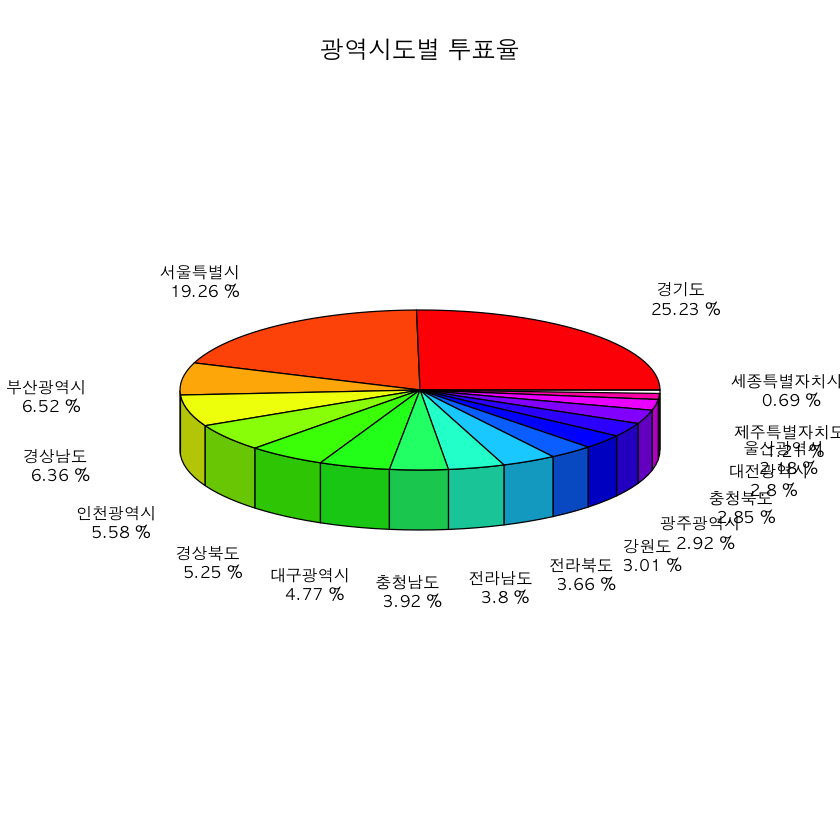

In [4]:
library(plotrix)
광역시도 <- election.1$광역시도
#광역시도
투표율 <- round(election.1$투표수/sum(election.1$투표수)*100,2)
#투표율
label <- paste(광역시도,'\n',투표율,'%')

options(warn=-1)
par(family="AppleGothic",bg='white')
pie3D(arrange(election.1,desc(투표수))$투표수,
    radius = 0.8, # 파이 크기 조절하기 default=1
    main='광역시도별 투표율',
    labels=label,
    #explode=0.05, # 쪼개버리기
    labelcex=0.8 # 글자 크기 80%
)

In [5]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum = apply(election[,5:7],1,sum) # apply(dataset,방향,연산)

In [6]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [7]:
# electionRatio <- 투표수 대비 electionSum의 백분율
election$electionRatio <- round(election$electionSum / election$투표수 *100,2)
# electionRatio3
#election$electionRatio3 <- round(election$이재명/election$투표수*100,2)


In [8]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.01


In [9]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
## 1, arrange
arrange(election,electionRatio)[c(1,length(election$electionRatio)),]

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
1,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02
248,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.70


In [10]:
## 2, subset
subset(election,electionRatio==max(election$electionRatio))
subset(election,electionRatio==min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.7


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02


In [11]:
# election_2022_job1.csv로 저장하기
write.csv(election,'../data/election_2022_job1.csv', row.names=F)
# row.names=F 안하면 계속 열 이름이 추가된다

광역시도,윤석열
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747
세종특별자치시,101491


광역시도,윤석열득표율
경기도,23.7
서울특별시,20.0
경상북도,7.9
부산광역시,7.8
경상남도,7.6
대구광역시,7.4
인천광역시,5.4
충청남도,4.1
강원도,3.4
충청북도,3.0


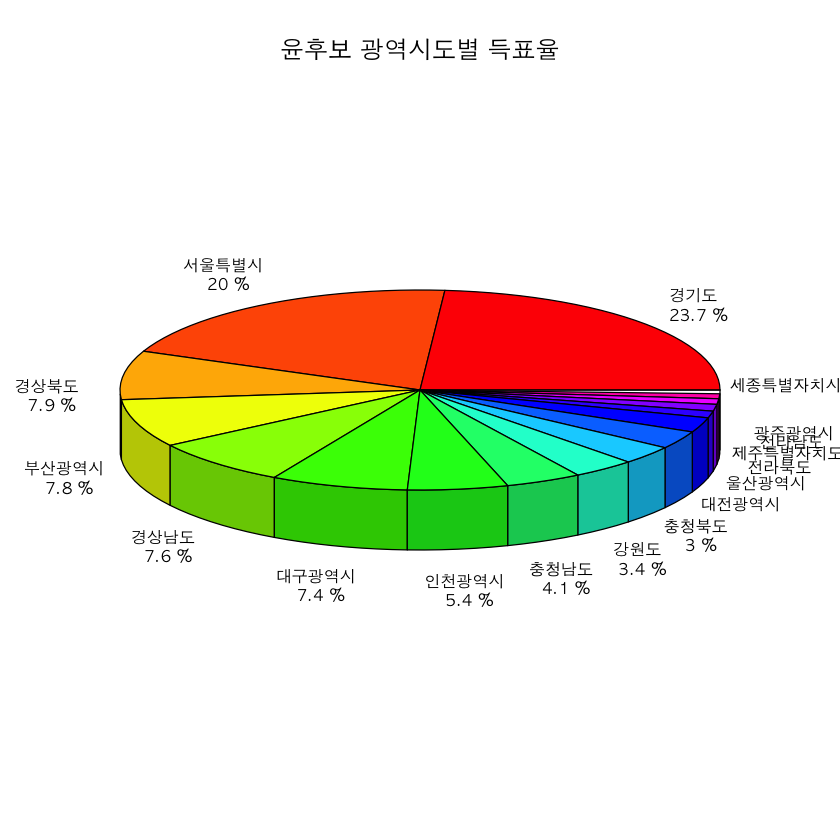

In [12]:
# 각 후보의 광역시도별 득표율을 pie3D 차트로 표현하기(단, 득표율 3% 미만인 광역시도는 수치 없이)
#총투표수 <- aggregate(투표수~광역시도,election,sum)
#총투표수
윤석열 <- aggregate(윤석열~광역시도,election,sum)
윤석열
윤석열.득표율 <- arrange(data.frame(광역시도=윤석열$광역시도,윤석열득표율=round(윤석열$윤석열/sum(윤석열$윤석열)*100,1)),desc(윤석열득표율))
윤석열.득표율

광역시도 <- 윤석열.득표율$광역시도
#광역시도
득표율 <- 윤석열.득표율$윤석열득표율
#득표율
label <- ifelse(득표율>=3,paste(광역시도,'\n',득표율,'%'),paste(광역시도))

par(family="AppleGothic",bg='white')
pie3D(윤석열.득표율$윤석열득표율,
    radius = 1, # 파이 크기 조절하기 default=1
    main='윤후보 광역시도별 득표율',
    labels=label,
    #explode=0.05, # 쪼개버리기
    labelcex=0.8 # 글자 크기 80%
)

In [13]:
# 수도권(경기도,서울,인천)의 전국 대비 투표인구수 백분율은?
round(sum(subset(election,광역시도 %in% c('경기도','서울특별시','인천광역시'))$투표수)/sum(election$투표수) * 100,2)

[1] 50.06

In [14]:
# 윤석열 후보의 서울특별시 top 5 지역은 각 지역명으로, 타지역은 기타로 파이3d 출력하기
electS <- subset(election,광역시도 == '서울특별시') # 서울특별시 데이터만 발췌
# election[election$광역시도=='서울특별시',] # 이런 방식도 가능, python 방식
# seoulY <- arrange(electS,desc(윤석열))[,c(2,6)] # 2번과 6번 열만 가져온다.
# round(c(seoulY[1:5, 2],sum(seoulY[-c(1:5),2]))/sum(seoulY$윤석열)*100,2) # 이 방식은 벡터 방식
seoulY <- arrange(data.frame(시군구=electS$시군구,득표율=round(aggregate(윤석열~시군구,electS,sum)$윤석열/sum(aggregate(윤석열~시군구,electS,sum)$윤석열)*100,2)),desc(득표율))
seoulY
seoulY5 <- rbind(seoulY[1:5,],data.frame(시군구='기타',득표율=sum(seoulY[c(6:nrow(seoulY)),2])))
seoulY5

시군구,득표율
금천구,7.84
종로구,7.25
성동구,5.58
양천구,5.51
강북구,5.02
중구,4.93
광진구,4.67
영등포구,4.60
서초구,4.32
은평구,4.17


시군구,득표율
금천구,7.84
종로구,7.25
성동구,5.58
양천구,5.51
강북구,5.02
기타,68.81


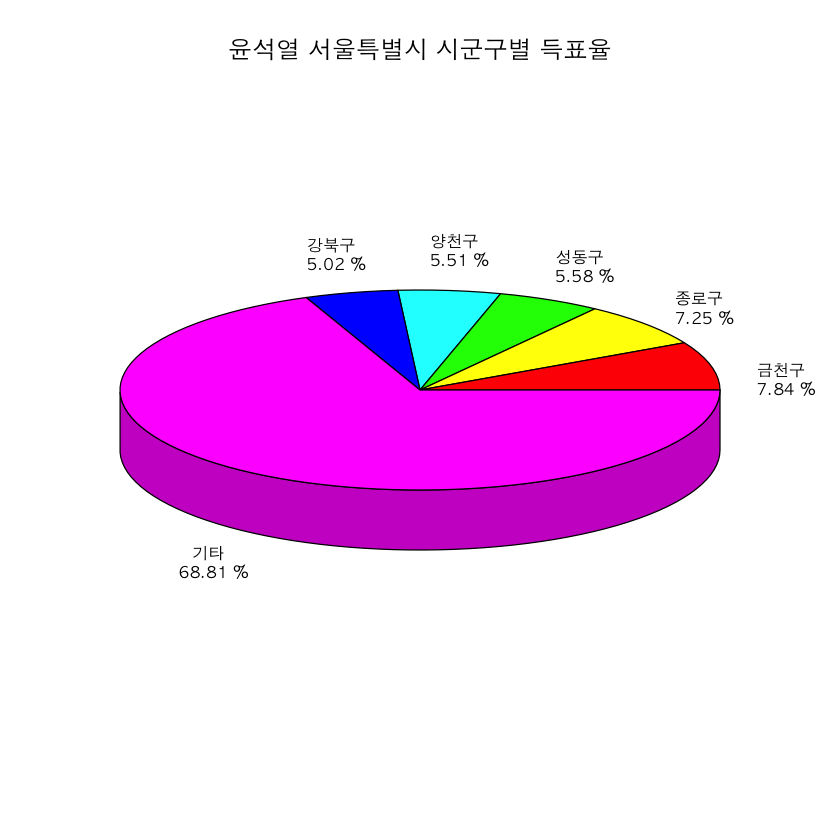

In [15]:
시군구 <- seoulY5$시군구
#시군구
득표율 <- seoulY5$득표율
#득표율
label <- paste(시군구,'\n',득표율,'%')

par(family="AppleGothic",bg='white')
pie3D(seoulY5$득표율,
    radius = 1, # 파이 크기 조절하기 default=1
    main='윤석열 서울특별시 시군구별 득표율',
    labels=label,
    #explode=0.05, # 쪼개버리기
    labelcex=0.8 # 글자 크기 80%
)

In [16]:
# 대선주자 출생지별 득표율 분석
# 윤석열 후보의 출생지는 서울특별시 성북구
electSS <- electS[electS$시군구=='성북구',]
득표수 <- as.numeric(c(electSS[,c('이재명','윤석열','심상정')],electSS[,'투표수']-sum(electSS[,c('이재명','윤석열','심상정')])))
득표율 <- round(득표수/sum(electSS[,'투표수'])*100,2); 득표율
#이재명 = round(electS[electS$시군구=='성북구','이재명'] / electS[electS$시군구=='성북구','투표수']*100,2);이재명
#윤석열 = round(electS[electS$시군구=='성북구','윤석열'] / electS[electS$시군구=='성북구','투표수']*100,2);윤석열
#심상정 = round(electS[electS$시군구=='성북구','심상정'] / electS[electS$시군구=='성북구','투표수']*100,2);심상정
#기타 = 100 - (이재명+윤석열+심상정);기타
#성북구 = c(이재명,윤석열,심상정,기타);성북구
성북구.득표율=arrange(data.frame(후보=c('이재명','윤석열','심상정','기타'),득표율),desc(득표율));성북구.득표율


[1] 48.84 46.22  3.06  1.88

후보,득표율
이재명,48.84
윤석열,46.22
심상정,3.06
기타,1.88


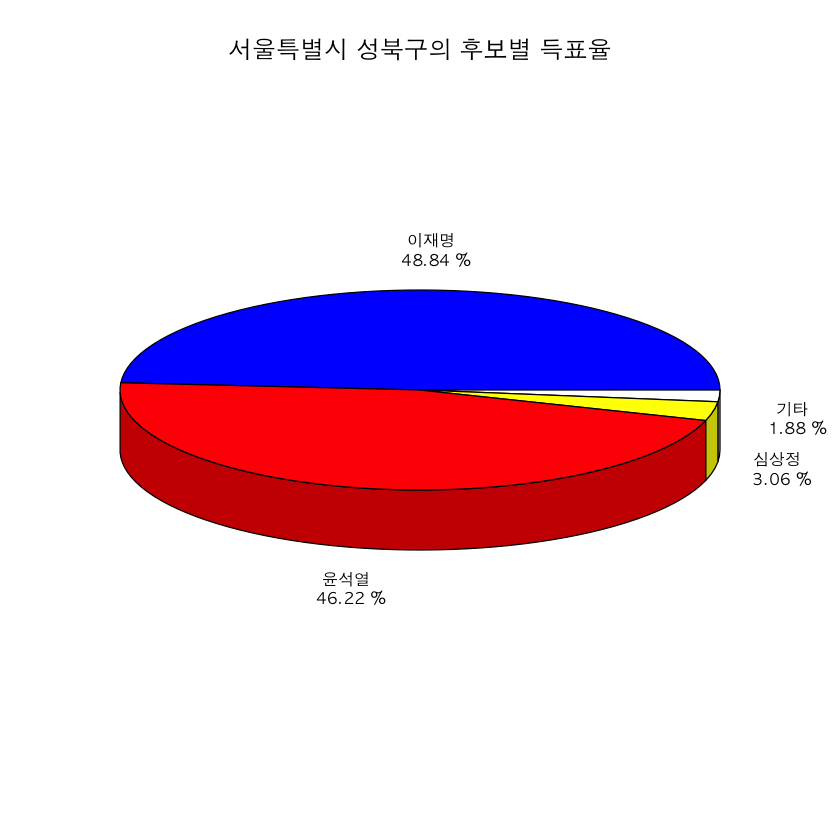

In [17]:
label <- paste(성북구.득표율$후보,'\n',성북구.득표율$득표율,'%')

par(family="AppleGothic",bg='white')
pie3D(성북구.득표율$득표율,
    radius = 1, # 파이 크기 조절하기 default=1
    main='서울특별시 성북구의 후보별 득표율',
    labels=label,
    labelcex=0.8, # 글자 크기 80%
    col = c('blue','red','yellow','white')
)

---
### 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차를 막대그래프로 시각화한다

In [18]:
elect4 <- head(arrange(aggregate(cbind(투표수,이재명,윤석열,심상정)~광역시도,election,sum),desc(투표수)),4)
elect4[1:4,-c(1:2)]
elect4$광역시도 <- as.character(elect4$광역시도)
elect4mt <- t(as.matrix(elect4[1:4,-c(1:2)]))
colnames(elect4mt)=c('경기도','서울특별시','부산광역시','경상남도')
elect4mt/10000


이재명,윤석열,심상정
4297931,3859666,201113
2944981,3255747,180324
831896,1270072,47541
794130,1237346,52591


,경기도,서울특별시,부산광역시,경상남도
이재명,429.7931,294.4981,83.1896,79.4130
윤석열,385.9666,325.5747,127.0072,123.7346
심상정,20.1113,18.0324,4.7541,5.2591


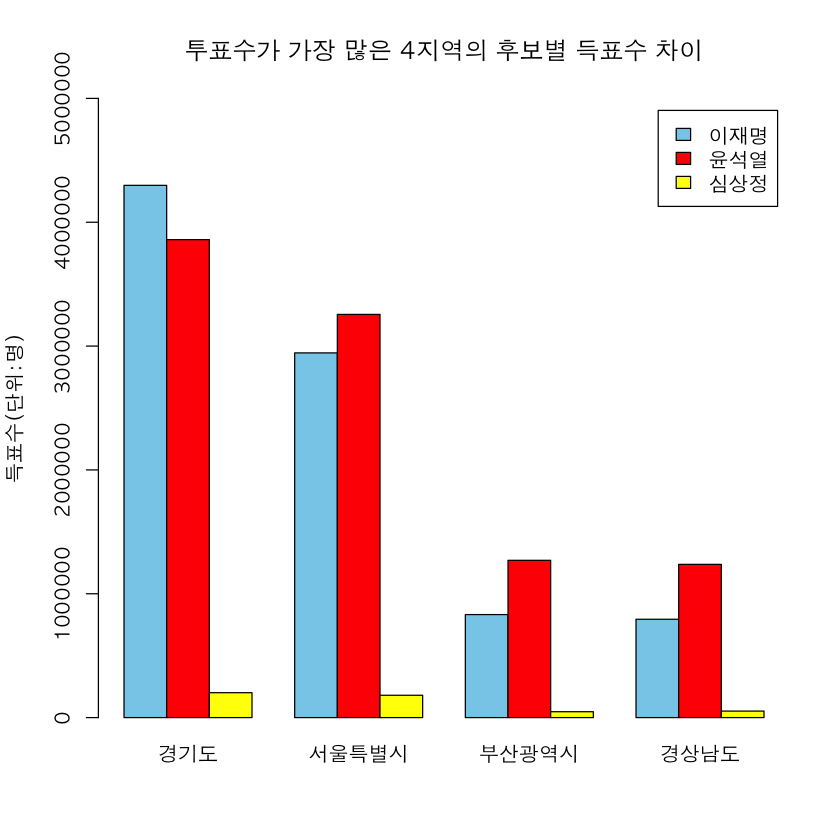

In [19]:
options(scipen=100)
par(family="AppleGothic",bg='white')
barplot(elect4mt,
    beside=T,
    ylab='득표수(단위:명)',
    ylim=c(0,5000000),
    main='투표수가 가장 많은 4지역의 후보별 득표수 차이',
    col=c('sky blue','red','yellow'),
    legend.text=T
)

---
### 투표수가 높은 시군구의 후보별 득표수를 막대그래프로 시각화

In [20]:
electR5 <- t(head(arrange(election,desc(투표수)),5)[,c('이재명','윤석열','심상정')])
head(arrange(election,desc(투표수)),5)[,c('광역시도','시군구')]
paste(head(arrange(election,desc(투표수)),5)[,'광역시도'],head(arrange(election,desc(투표수)),5)[,'시군구'])
colnames(electR5) <- c('경기도 화성시','경기도 부천시','경기도 남양주시','서울특별시 송파구','서울특별시 강서구')
electR5

광역시도,시군구
경기도,화성시
경기도,부천시
경기도,남양주시
서울특별시,송파구
서울특별시,강서구


[1] "경기도 화성시"     "경기도 부천시"     "경기도 남양주시"  
[4] "서울특별시 송파구" "서울특별시 강서구"

,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


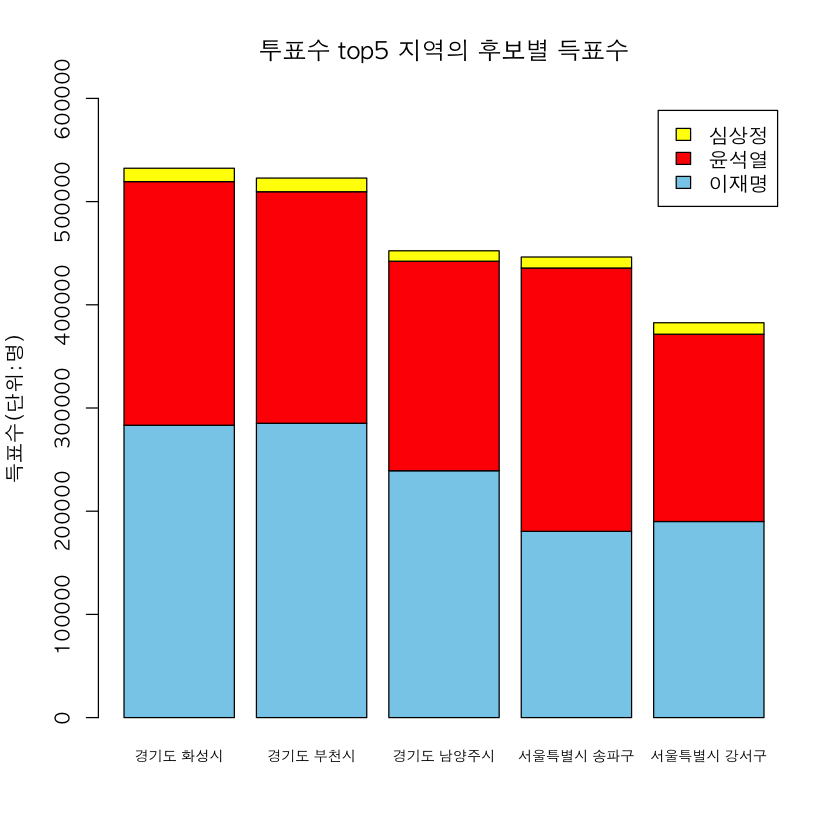

In [21]:
par(family="AppleGothic",bg='white')
barplot(electR5,
    ylab='득표수(단위:명)',
    ylim=c(0,600000),
    main='투표수 top5 지역의 후보별 득표수',
    col=c('sky blue','red','yellow'),
    cex.names=0.7,
    legend.text=T
)

In [22]:
head(arrange(election,desc(electionRatio)))

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.70
경기도,용인시수지구,304545,250764,113161,128995,5334,247490,98.69
서울특별시,서초구,344756,277878,88686,179472,5864,274022,98.61
서울특별시,강남구,451970,354778,106865,235897,7020,349782,98.59
경기도,하남시,265087,208858,101106,100088,4624,205818,98.54
경기도,용인시기흥구,361753,289459,143279,135606,6267,285152,98.51


---
### 권역별 후보 지지율 꺾은선 그래프, 팀별 문제 출제

In [23]:
수도권 <- c('서울특별시','인천광역시','경기도')
강원권 <- '강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

In [24]:
# 지역 컬럼에 권역이름 넣기
election$지역 <- ifelse(election$광역시도 %in% 수도권,'수도권',
    ifelse(election$광역시도 %in% 강원권,'강원권',
        ifelse(election$광역시도 %in% 영남권,'영남권',
            ifelse(election$광역시도 %in% 충청권,'충청권','호남권'))))
head(election)
electX <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~지역,election,sum)
electX$ratio <- round(electX$투표수/electX$선거인수*100,2) # 투표율
electX$ratioL <- round(electX$이재명/electX[,3]*100,2) # 이재명 지지율
electX$ratioY <- round(electX$윤석열/electX[,3]*100,2) # 윤석열 지지율
electX$ratioS <- round(electX$심상정/electX[,3]*100,2) # 심상정 지지율
# 투표율이 높은 순으로 정렬
arrange(electX,desc(ratio))
arrange(electX,(ratio))
electXm <- (as.matrix(arrange(electX,desc(ratio))[,c('ratioL','ratioY','ratioS')]))
rownames(electXm) <- arrange(electX,desc(ratio))$지역
colnames(electXm) <- c('이재명','윤석열','심상정')
electXm
class(electXm[1])

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,지역
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80,수도권
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19,수도권
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30,수도권
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18,수도권
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99,수도권
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.01,수도권


지역,선거인수,투표수,이재명,윤석열,심상정,ratio,ratioL,ratioY,ratioS
호남권,4887963,3912521,3154923,619883,64193,80.04,80.64,15.84,1.64
영남권,10993369,8468363,2686576,5382549,185678,77.03,31.72,63.56,2.19
수도권,21971908,16904189,8156232,7993973,433289,76.94,48.25,47.29,2.56
강원권,1333621,1015458,419644,544980,25031,76.14,41.33,53.67,2.46
충청권,4602633,3464133,1573443,1719055,89261,75.26,45.42,49.62,2.58


지역,선거인수,투표수,이재명,윤석열,심상정,ratio,ratioL,ratioY,ratioS
충청권,4602633,3464133,1573443,1719055,89261,75.26,45.42,49.62,2.58
강원권,1333621,1015458,419644,544980,25031,76.14,41.33,53.67,2.46
수도권,21971908,16904189,8156232,7993973,433289,76.94,48.25,47.29,2.56
영남권,10993369,8468363,2686576,5382549,185678,77.03,31.72,63.56,2.19
호남권,4887963,3912521,3154923,619883,64193,80.04,80.64,15.84,1.64


,이재명,윤석열,심상정
호남권,80.64,15.84,1.64
영남권,31.72,63.56,2.19
수도권,48.25,47.29,2.56
강원권,41.33,53.67,2.46
충청권,45.42,49.62,2.58


[1] "numeric"

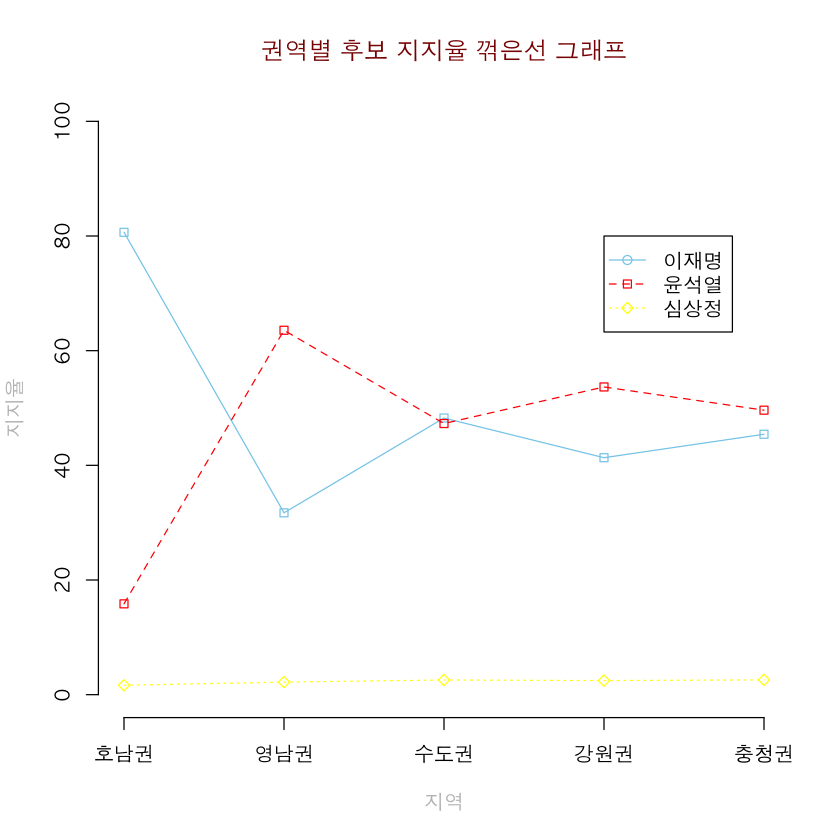

In [25]:
par(family="AppleGothic",bg='white')

plot(electXm[,1],
    type = "o", # overlap, 꼭짓점을 선 위에 표시
    xlab='지역',
    ylab='지지율(%)',
    ylim=c(0,100),
    col = "sky blue",
    pch=22,
    axes = F, # x,y 축 좌표 frame을 제거
    ann = F, # x,y 축 label을 제거
)

# 선그리기 함수로 def 그리기, lines : 선만 그려지는 그래프
lines(electXm[,2],
    type="o",
    pch=22,
    col='red',
    lty=2, # linetype : 점선
) 

# 선그리기 함수로 ghi 그리기
lines(electXm[,3],
    type='o',
    pch=23,
    col='yellow',
    lty=3
)

# x축과 x축의 라벨을 설정하기
axis(1, at=1:5, lab=rownames(electXm))

# y축과 y축의 라벨을 설정하기
axis(2)

# main title 지정
title(main='권역별 후보 지지율 꺾은선 그래프', col.main='darkred')

# x축 title(label) 지정
title(xlab='지역', col.lab='grey')

# y축 title(label) 지정
title(ylab='지지율', col.lab='grey')

# 범례 : legend
legend(4, 80, # legend 박스 위치 좌표
    colnames(electXm), # 각 그래프의 이름
    col = c('sky blue','red','yellow'), # 각 그래프의 색상
    pch=c(21,22,23), # 각 그래프의 점 종류
    lty=c(1,2,3), # 각 그래프의 선 종류
    cex=1, # 박스 사이즈 줄이기(default=1)
) 

지역,선거인수,투표수,이재명,윤석열,심상정,ratio,이ratio,윤ratio,심ratio
호남권,4887963,3912521,3154923,619883,64193,80.04,80.64,15.84,1.64
영남권,10993369,8468363,2686576,5382549,185678,77.03,31.72,63.56,2.19
수도권,21971908,16904189,8156232,7993973,433289,76.94,48.25,47.29,2.56
강원권,1333621,1015458,419644,544980,25031,76.14,41.33,53.67,2.46
충청권,4602633,3464133,1573443,1719055,89261,75.26,45.42,49.62,2.58


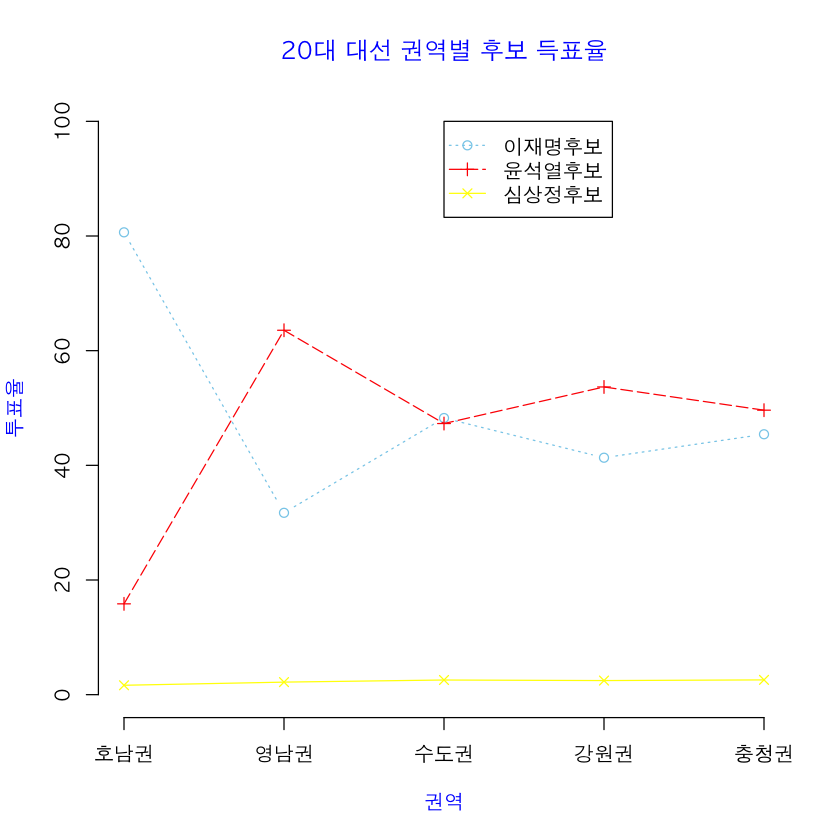

In [26]:
par(family="AppleGothic")
수도권 <-c('서울특별시','인천광역시','경기도')
강원권 <-'강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

election$지역 <- ifelse(election$광역시도 %in% 수도권,'수도권',
               ifelse(election$광역시도 %in% 강원권,'강원권',
                     ifelse(election$광역시도 %in% 영남권,'영남권',
                           ifelse(election$광역시도 %in% 충청권,'충청권','호남권'))))
elec1 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~지역,election,sum)
elec1$ratio <- round(elec1$투표수/elec1$선거인수*100,2)
elec1$이ratio <- round(elec1$이재명/elec1$투표수*100,2)
elec1$윤ratio <- round(elec1$윤석열/elec1$투표수*100,2)
elec1$심ratio <- round(elec1$심상정/elec1$투표수*100,2)
arrange(elec1,desc(ratio))
elec2 <- t(arrange(elec1,desc(ratio))[1:5,7:10])
colnames(elec2)=c('호남권','영남권','수도권','강원권','충청권')
이 <- elec2[2,]
윤 <- elec2[3,]
심 <- elec2[4,]
plot(이,
     type ="b",
     ylim=c(0,100),
     axes=F,
     ann=F,
     col="sky blue",
     lty=3
    )
legend(3,100,
      c("이재명후보","윤석열후보","심상정후보"),
      col=c("sky blue","red","yellow"),
      pch=c(21,3,4),
      lty=c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=c('호남권','영남권','수도권','강원권','충청권'))
axis(2,ylim=c(0,100))
lines(윤,
      type="o",
      pch=3,
      col="red",
      lty=5
     )
lines(심,
      type="o",
      pch=4,
      col="yellow",
      lty=1
     )

---
### 4조의 문제

In [27]:
electHT <- arrange(aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum),desc(투표수/선거인수))[c(1,length(광역시도)),]
electHT
electHT$electL <- round(electHT$이재명/electHT$투표수*100,2)
electHT$elecY <- round(electHT$윤석열/electHT$투표수*100,2)
electHT$electS <- round(electHT$심상정/electHT$투표수*100,2)
electHT$electE <- 100-apply(electHT[,7:9],1,sum)
electHT
electHTm <- t(as.matrix(electHT[,10:7]))
colnames(electHTm) <- paste(c('최고 : ','최저 : '),electHT$광역시도)
rownames(electHTm) <- c('기타','심상정','윤석열','이재명')
electHTm

,광역시도,선거인수,투표수,이재명,윤석열,심상정
1,광주광역시,1209206,985492,830058,124511,14865
17,제주특별자치도,564354,409649,213130,173014,13598


,광역시도,선거인수,투표수,이재명,윤석열,심상정,electL,elecY,electS,electE
1,광주광역시,1209206,985492,830058,124511,14865,84.23,12.63,1.51,1.63
17,제주특별자치도,564354,409649,213130,173014,13598,52.03,42.23,3.32,2.42


,최고 : 광주광역시,최저 : 제주특별자치도
기타,1.63,2.42
심상정,1.51,3.32
윤석열,12.63,42.23
이재명,84.23,52.03


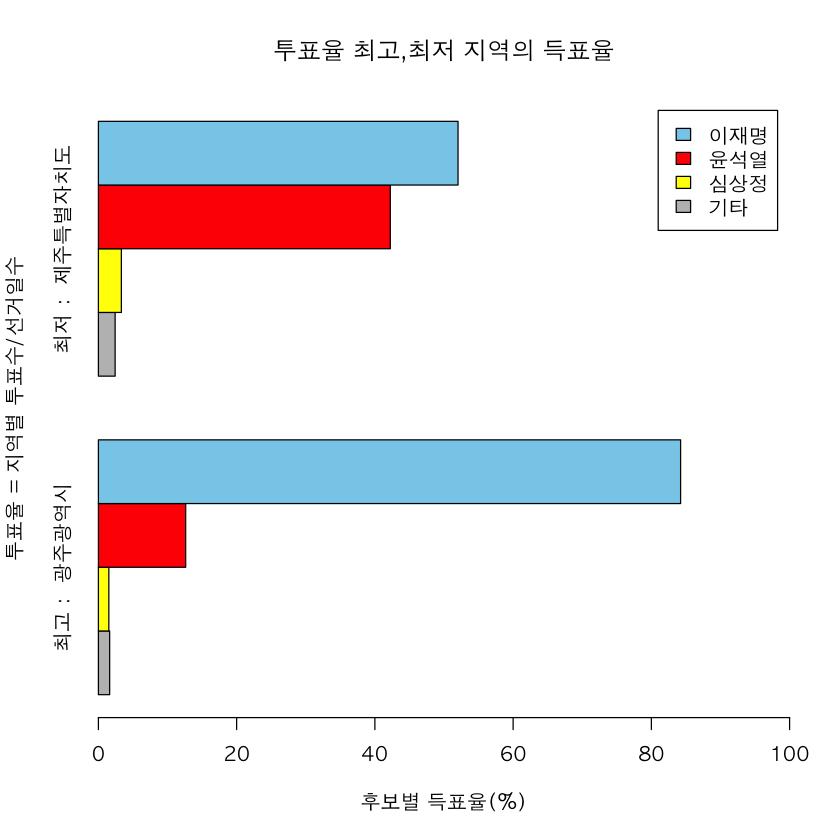

In [28]:
par(family="AppleGothic",bg='white')
barplot(electHTm,
    beside=T,
    horiz=T, # x,y 설정해줬던 값들 변경
    legend.text=T,
    main='투표율 최고,최저 지역의 득표율',
    xlab='후보별 득표율(%)',
    ylab='투표율 = 지역별 투표수/선거일수',
    xlim=c(0,100),
    col=c('grey','yellow','red','sky blue')
)

---
### 2조의 문제

,이재명,윤석열,투표율,합계
강원도,0,14,14,28
경기도,12,6,26,44
경상남도,0,18,18,36
경상북도,0,22,22,44
광주광역시,5,0,5,10
대구광역시,0,8,8,16
대전광역시,0,1,4,5
부산광역시,0,8,8,16
서울특별시,2,8,24,34
세종특별자치시,1,0,1,2


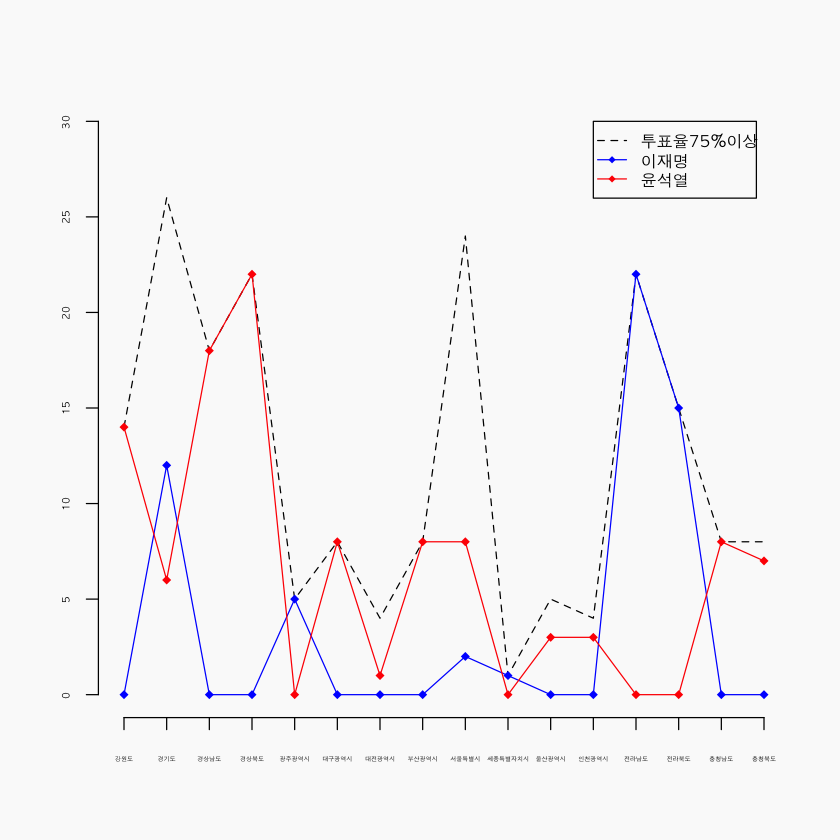

In [34]:
par(family = 'AppleGothic', bg = '#fafafa')

election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 >= 0.5) # 투표율이 75프로 이상, 득표율이 50프로 이상
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 >= 0.5) 
투표율 <- subset(election, 투표율>=0.75) # 투표율이 75프로 이상, 전체

# 투표율 75 이상, 득표율 50 이상의 조건을 충족하는 광역시도의 빈도
차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도))) # 광역시도의 빈도, table : 광역시도의 빈도가 의미하는게 시군구의 수(시군구의 수만큼 광역시도가 반복되기 때문)
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율 # 이재명, 윤석열, 투표율의 빈도 합계
차트 <- subset(차트 , 이재명!= 0 | 윤석열 != 0 | 투표율 != 0 | 합계 != 0) # 행 전체가 0인 빈 값 제거
차트

plot(
    c(차트[,3]),
    main='광역시도 별 과반수 득표가 나온 시군구 갯수',
    type='l',
    ylab='시군구수',
    xlab='광역시도',
    cex.axis = 0.1,
    ylim=c(0,30),
    lty = 2,
    axes =F, #x,y 좌표 frame 제거
    ann=F, #x,y label 제거
   
)
axis(1,at=1:16, lab=colnames(t(차트)), cex.axis=0.3)
axis(2, cex.axis=0.5)

lines(
    c(차트[,1]),
    col='blue',
    type='o',
    pch=18,
    lty=1,
)
lines(
    c(차트[,2]),
    col='red',
    type='o',
    pch=18,
    lty=1,
)
legend(12,30, 
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8 
    )